In [ ]:
#hide this cell when in use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!git clone https://github.com/propublica/compas-analysis/
from datetime import datetime
from sklearn.model_selection import train_test_split

Cloning into 'compas-analysis'...
remote: Enumerating objects: 31, done.
remote: Total 31 (delta 0), reused 0 (delta 0), pack-reused 31
Receiving objects: 100% (31/31), 15.24 MiB | 11.40 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Updating files: 100% (12/12), done.


Import necessary datasets

In [ ]:
two_years_v = pd.read_csv('./compas-analysis/compas-scores-two-years-violent.csv')
two_years = pd.read_csv('./compas-analysis/compas-scores-two-years.csv')
compas = pd.read_csv('./compas-analysis/compas-scores.csv')

#convert date of birth column to age, which is not relevant for including in a separate question
dated = pd.to_datetime(compas['dob'], format="%Y-%m-%d")
year = pd.DatetimeIndex(compas['dob']).year
compas['age'] = 2024 - year

#N/A columns removed without a question for that
compas = compas[compas.decile_score != -1]
compas_simple = compas[['id', 'name', 'sex', 'age', 'priors_count', 'decile_score', 'score_text']].set_index('id')
compas_full = compas[compas.is_recid != -1][['id', 'name', 'sex', 'age', 'priors_count', 'race', 'decile_score', 'score_text', 'is_recid']].set_index('id')
compas_total = compas[compas.is_recid != -1][['id', 'name', 'sex', 'age', 'priors_count', 'race', 'decile_score', 'score_text', 'is_recid', 'race']].set_index('id')

# Introduction

##### Northpointe, a **for-profit company**, has created a model that generates '**risk scores**' for criminals, representing the **likelihood of reoffending**, based on several factors. You have decided to analyze their data for accuracy. Below is a table which contains defendent information. The 'decile_score' column is a number between 1-9 that represents the algorithm's output, and the 'score_text' column corresponds to a low, medium, or high score. Both the 'decile_score' and 'score_text' columns are predicted by the algorithm.

#[TO DO] Raw scores coming soon! (Join via the database and possibly normalize)

In [ ]:
compas_simple.head(5)

,name,sex,age,priors_count,decile_score,score_text
id,,,,,,
1,miguel hernandez,Male,77,0,1,Low
2,michael ryan,Male,39,0,5,Medium
3,kevon dixon,Male,42,0,3,Low
4,ed philo,Male,33,4,4,Low
5,marcu brown,Male,31,1,8,High


## Question 1: Understanding the Data
##Todo: Reconsider placement of the written questions again and give length suggestions with each question

**Question 1.1** What columns would be useful to predict whether a defendant would reoffend? What would you expect higher values to correspond to? What would we not want to include as variables when we predict? This question is open-ended and responses will vary.

_ANSWER HERE_

**Question 1.2**  Who would this algorithm be used by, and what for? Please include second-order and higher-order uses, and expand your answer past what was introduced at the beginning.

_ANSWER HERE_

**Question 1.3 (code)** - We're interested in seeing whether certain factors are correlated with decile scores. We've split our original data into a training and test set. Using your answers from above, choose a trait from the data that interests you, and perform some exploratory data analysis using the *table* dataframe inside the EDA function to answer the next question. Some visualizations you may find helpful are bar charts, histograms, or scatterplots.

The code is ungraded, but the visualizations are.

Hints: Measure correlations between two columns of your choice and repeat, making sure to keep all of your results.

In [ ]:
train, test = train_test_split(compas_simple, test_size=0.2)
def EDA(table):
  ...#CODE HERE
EDA(train)

**Question 1.4** Do you see any patterns in the data? If so, please form a hypothesis of why this pattern may exist, and include how confident you are for both parts.


_ANSWER HERE_

**Question 1.5** We've loaded the test data below: the function will perform exactly same analysis you did on the training data to this dataset. Do you see the same patterns? If not, can you think of reasons why?

In [ ]:
EDA(test)
#Do not add code in this cell.

_ANSWER HERE_

# Question 2: Impacts

##### What does an accurate model mean?
##### Todo: Following this example, condense themes and place into each question.

Suppose we now have access to whether the defendant actually reoffended - this data is stored in our is_recid column, which is a 1 if they recidivized, and a 0 if they did not.

In [ ]:
compas_full.head(5) #with recid column - labelled 1 if they did reoffend, and 0 otherwise

,name,sex,age,priors_count,race,decile_score,score_text,is_recid
id,,,,,,,,
1,miguel hernandez,Male,77,0,Other,1,Low,0
3,kevon dixon,Male,42,0,African-American,3,Low,1
4,ed philo,Male,33,4,African-American,4,Low,1
5,marcu brown,Male,31,1,African-American,8,High,0
6,bouthy pierrelouis,Male,51,2,Other,1,Low,0


**Question 2.1** Write code to calculate the accuracy, false_positive, and false_negative rates. (We can assume a score_text of Medium or High is a prediction that the defendant will reoffend, and a score_text of Low is a prediction the defendant will not reoffend). Remember that accuracy is defined as **correct predictions** as a proportion of **all predictions**. Feel free to take as many lines as needed.



In [ ]:
#ADD CODE HERE
...
...

false_positive = ...
false_negative = ...
accuracy = ...

**Question 2.2** It seems like the accuracy of our model is pretty high (by some standards)! However, it also has a high rate of false positives compared to false negatives. What are the potential implications of a false positive or a false negative? Feel free to reference previous answers or at the textbook.

_ANSWER HERE_

**Question 2.3** In this scenario, how would you balance false positives and false negatives? Which one is more harmful, and which one would the users of this algorithm be motivated to minimize? Consider adding upon the points you mentioned in Question 1.2.

_ANSWER HERE_

##### Todo: Change phrasing to reference raw scores once implemented
**Question 2.4** Suppose that we want to calculate the accuracy, false positive, and false negatives based off the raw/decile score, and not the score_text column.

Below we have defined a function called _hidden_function_ that takes in two arguments: a table containing an is_recid column and a raw/decile score. It that calculates the accuracy, false positive rate, and raw/decile score based off a given raw/decile score threshold, which would represent a positive prediction in our algorithm. Explain any patterns you see as you increase or decrease the threshold.

In [ ]:
#you can ignore the code here:
%pip install -q ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.2 MB/s eta 0:00:00


In [ ]:
#@title This cell defines a hidden function
def hidden_function(tbl, threshold):
  """Takes in a table with an is_recid column and returns the accuracy, false positive rate, and false negative rate"""
  true_positives = len(tbl[( (tbl.is_recid==1) &
  (tbl.decile_score >= threshold) )])
  true_negatives = len(tbl[(tbl.is_recid==0) & (tbl.decile_score < threshold) ])
  false_positives = len(tbl[((tbl.is_recid==0) & (tbl.decile_score >= threshold) ) ])
  false_negatives = len(tbl[(tbl.is_recid==1) & (tbl.decile_score < threshold) ])

  accuracy = (true_positives + true_negatives) / len(tbl)
  false_positive_rate = false_positives / len(tbl)
  false_negative_rate = false_negatives / len(tbl)
  print('Accuracy: ', accuracy)
  print('False Positive Rate: ', false_positive_rate)
  print('False Negative Rate: ', false_negative_rate)
  return [accuracy, false_positive_rate, false_negative_rate]

#####Todo: Complete widget
Remember that the threshold represents the minimum for a positive prediction by the algorithm - for example, if I set my threshold as 4, all defendants who received a raw/decile score of 4 would be predicted as likely to re-offend.

In [ ]:
thresh = 4


#Run this cell to see how the statistics change!
interact(hidden_function, tbl=fixed(compas_full), threshold=thresh)

interactive(children=(IntSlider(value=4, description='threshold', max=12, min=-4), Output()), _dom_classes=('w…

<function __main__.hidden_function(tbl, threshold)>

_ANSWER HERE_

##**End of Part 1**

# PART 2 - Question 3: A Hidden Impact


**Question 3.1** Calculate accuracy for black versus white defendants. The accuracy for white defendants is provided for you, and was calculated using a staff solution based on the definition of accuracy mentioned in 2.1. You can assume the threshold is a raw/decile score of 4. _hidden_function_ may be helpful for this problem. Hint: remember that our function takes in a table - how do we filter compas_full to only include the demographic of interest?

In [ ]:
compas_full

,name,sex,age,priors_count,race,decile_score,score_text,is_recid
id,,,,,,,,
1,miguel hernandez,Male,77,0,Other,1,Low,0
3,kevon dixon,Male,42,0,African-American,3,Low,1
4,ed philo,Male,33,4,African-American,4,Low,1
5,marcu brown,Male,31,1,African-American,8,High,0
6,bouthy pierrelouis,Male,51,2,Other,1,Low,0
...,...,...,...,...,...,...,...,...
11753,patrick hamilton,Male,56,1,Other,3,Low,0
11754,raymond hernandez,Male,31,3,Caucasian,7,Medium,1
11755,dieuseul pierre-gilles,Male,43,0,Other,4,Low,0


In [ ]:
#Fill in the ellipses here
white_accuracy = 0.627
white_false_positive_rate = 0.266
white_false_negative_rate = 0.107

compas_black = ...
statistics_array = ...

**Question 3.2** Can you think of reasons why these statistics differ?

_ANSWER HERE_

##### Todo: Scaffolding for EDA cells, normalize the plot so it looks better

**Question 3.3** While often a convenient example, race is not the only metric that are a consequence of blindly predicting data. Let's take a look at how decile scores are predicted for the age and sex columns. We've given a rudimentary violin plot below - please note anything you notice about the spread of distribution of the plot. What does this say about how the algorithm views different sexes' likelihood to reoffend? Different ages? Feel free to perform analysis similar to question 1 to better understand how age and gender affect COMPAS.

In [ ]:
compas_full = compas_full[compas_full['decile_score'] != -1]

In [ ]:
import plotly.express as px

fig = px.violin(compas_full, y="age", x="decile_score", color="sex", box=True, title='Gender Differences in Age Distribution per Decile Score')
fig.show()

In [ ]:
#CODE HERE - feel free to experiment and explore!
...
...

_WRITTEN ANSWER HERE_

**Question 3.4.1** Please review your answers to Question 1.2 and 2.3. Considering those who designed COMPAS, what columns would be considered correlation, general causation, and singular causation with reference to recidivism?

*ANSWER HERE*

**Question 3.4.2** Consider the effect that this algorithm would have on defendants, based on your answer to 3.3.1. What factors may affect a person's decision to recidivize?

_ANSWER HERE_

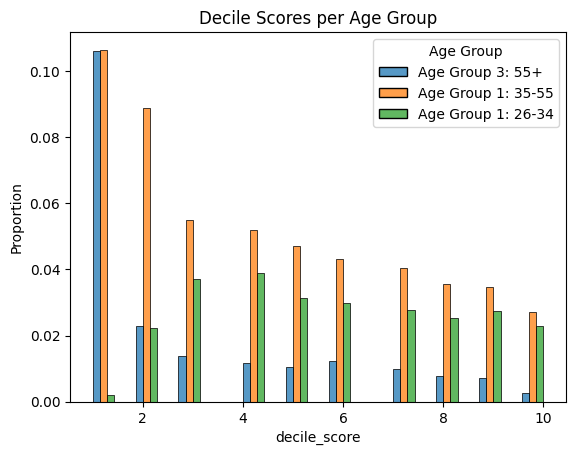

In [ ]:
# @title Hidden code
#add age groups

def age_group(age):
  if 26 <= age < 35:
    return 'Age Group 1: 26-34'
  elif 35 <= age < 55:
    return 'Age Group 1: 35-55'
  else:
    return 'Age Group 3: 55+'

compas_full['Age Group'] = compas_full['age'].apply(age_group)

sns.histplot(data=compas_full, x='decile_score', hue='Age Group', multiple='dodge', stat='proportion')
plt.title('Decile Scores per Age Group');

##### Todo: Change this histogram too to make it look more pleasing
**Question 3.4.3** What patterns do you see in the histogram above?

**Question 3.4.4** Considering COMPAS and this histogram, under which criteria, if any, is statistically modeling the human experience justified, and how can reductionism relate to this?

_ANSWER HERE_

# Question 4: Biases

**Question 4.1** You realize through a hypothetical source that Northpointe forgot to properly clean their data. You can interpret this in any way. Given your interpretation, what form(s) of bias would this be categorized as?

_ANSWER HERE_

The COMPAS algorithm was intended for judges to use when deciding sentence length for prisoners. Although the exact traits they used to predict are in a black box model, third parties have found that traits like age, gender, and socioeconomic status play large parts in determining the risk score. In addition, a 2018 assessment found that age played a huge part in the variation of the COMPAS score; more than past priors, gender, or even race.

**Question 4.2** Elaborating upon this context, please read these articles before answering this question, and review your other answers.

[Washington Post](https://https://www.washingtonpost.com/news/monkey-cage/wp/2016/10/17/can-an-algorithm-be-racist-our-analysis-is-more-cautious-than-propublicas/)

[ProPublica](https://https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm)

How do these two articles differ in their analysis of COMPAS?

_ANSWER HERE_

What factors motivate people to overlook flaws in this model, despite its past use? Do you think COMPAS is an appropriate model to use in courtrooms?

_ANSWER HERE_